 121~126

In [1]:
## 코렙 드라이브 마운트합니다.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/data/img

/content/drive/MyDrive/data/img


# 신경망 적용해보기

먼저 실행 권장(코랩): https://teddylee777.github.io/colab/google-colab-%EB%9F%B0%ED%83%80%EC%9E%84-%EC%97%B0%EA%B2%B0%EB%81%8A%EA%B9%80%EB%B0%A9%EC%A7%80    

> function ClickConnect(){   
    console.log("코랩 연결 끊김 방지");    
    document.querySelector("colab-toolbar-button#connect").click()    
}   
setInterval(ClickConnect, 60 * 1000)   

## 데이터 다운로드
[우린 코랩에서 직접 다운로드]    
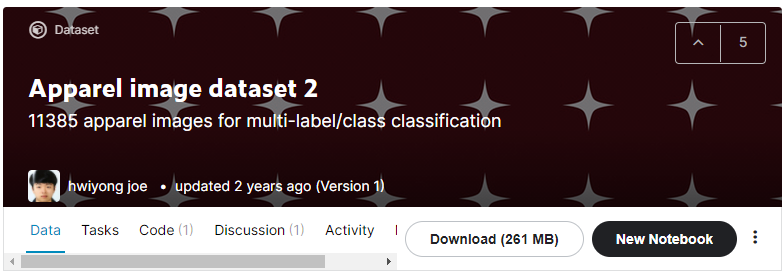    
https://www.kaggle.com/airplane2230/apparel-image-dataset-2?select=clothes_dataset

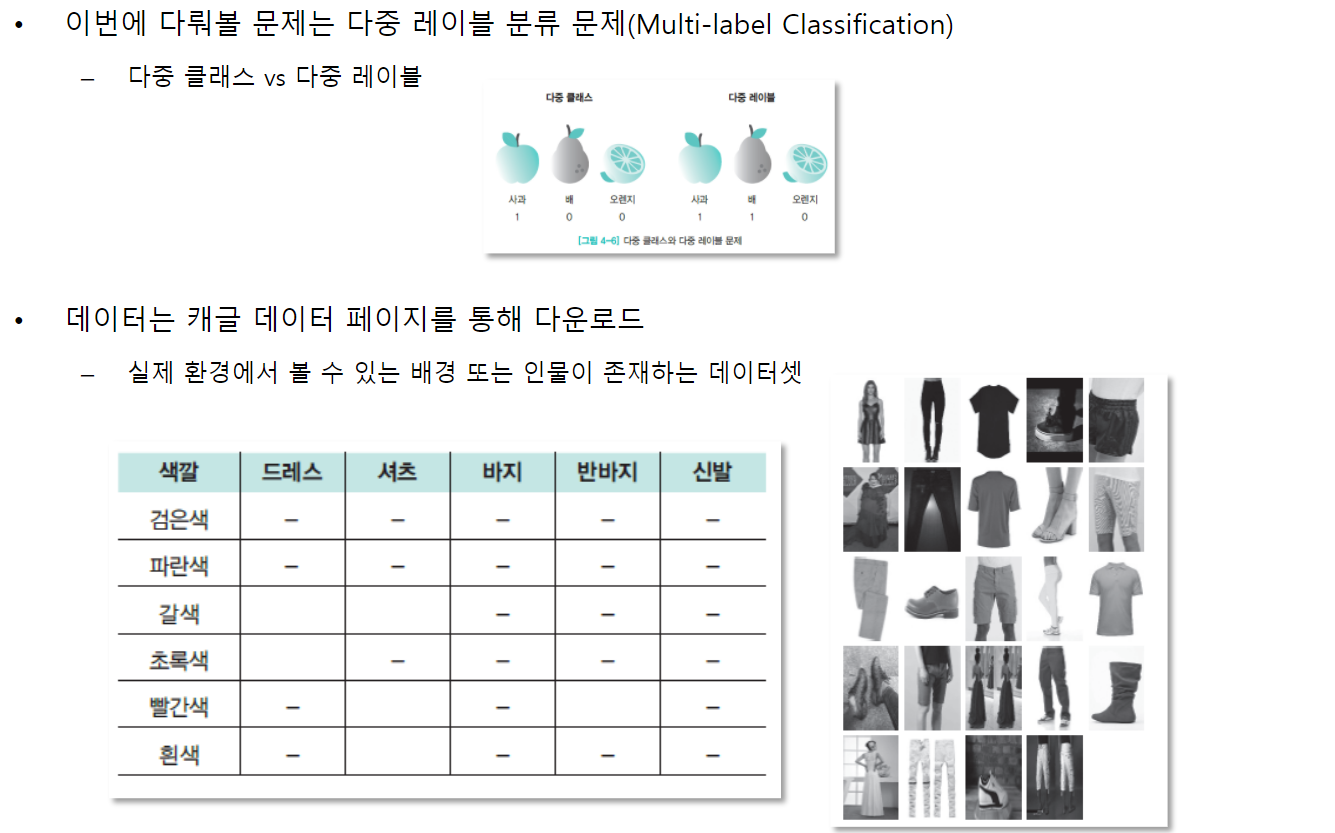

## 데이터 코랩에 데이터셋 다운로드

In [7]:
!pip install gdown
!gdown --id 1z1J2JlhQ9NOFKY0fP_F49rXaxDQxn-22 --output ./clothes_dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1z1J2JlhQ9NOFKY0fP_F49rXaxDQxn-22
To: /content/drive/My Drive/data/img/clothes_dataset.zip
100% 261M/261M [00:01<00:00, 136MB/s]


In [5]:
import os
import zipfile
os.mkdir('./csv_data')

In [6]:
with zipfile.ZipFile('/content/clothes_dataset.zip', 'r') as existing_zip:
  # 원본 데이터셋을 압축 해제한 디렉터리 경로
    existing_zip.extractall('./csv_data/nocolorinfo')

In [1]:
# 폴더 리스트 가져오기
from glob import glob
from PIL import Image
import numpy as np

folderList = glob('./data/clothes_dataset/clothes_dataset/*')
X=[]
y=[]

for folder in folderList:
  fileList = glob(folder+ '/*')

  for file in fileList:
    img=Image.open(file)
    img.resize((112,112)) ## 추가됨
    imgarr=np.array(img)
    X.append(imgarr)
    y.append(folder)

In [2]:
print(np.shape(y))
print(np.shape(X))

(11385,)
(11385,)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


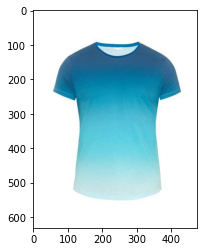

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X[5000])

In [36]:
y[5000].split('/')[3].split('\\')

['clothes_dataset', 'blue_shirt']

In [26]:
y[0]

'./data/clothes_dataset/clothes_dataset\\black_dress'

In [3]:
y1=[]; y2=[]

for z in y:
  tmp = z.split('/')[3]
  tmp2 = tmp.split('\\')[1]
  y1.append(tmp2.split('_')[0])
  y2.append(tmp2.split('_')[1])

In [38]:
X[:2]

[array([[[  1,   0,   0],
         [  4,   2,   3],
         [ 10,   8,   9],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  1,   0,   0],
         [  4,   2,   3],
         [ 10,   8,   9],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  1,   0,   0],
         [  4,   2,   3],
         [ 10,   8,   9],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        ...,
 
        [[148,  50,  51],
         [140,  42,  43],
         [134,  34,  36],
         ...,
         [145,  34,  40],
         [160,  49,  55],
         [167,  56,  62]],
 
        [[157,  59,  60],
         [145,  47,  48],
         [136,  36,  38],
         ...,
         [150,  39,  45],
         [154,  43,  49],
         [164,  55,  60]],
 
        [[167,  69,  70],
         [150,  52,  53],
         [135,  35,  37],
         ...,
         [151,  40,  46],
  

In [39]:
# npz 파일 제작법
np.savez('./data/test.npz', X=X, Y1=y1, Y2=y2)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


In [41]:
# 이렇게 저장된 npz만 갖고 다니면 됨
# npz불러오기
import numpy as np
loadnpz = np.load('./data/test.npz')
loadnpz

## 데이터 불러오기
- ‘image’는 이미지가 존재하는 전체 경로를 나타내며, 그 외 column은 이미지에 포함되어 있는 의류의 색과 종류를 나타냄

In [4]:
import pandas as pd

DATA_PATH = './data/clothes_dataset'

train_df = pd.read_csv(DATA_PATH + '/train.csv')
val_df = pd.read_csv(DATA_PATH + '/val.csv')
test_df = pd.read_csv(DATA_PATH + '/test.csv')

# Colab에서 사용한다면, 다음 코드 주석을 풀고, 실행시킵니다.
# 또한, Colab에서 사용하는 경우, file reading 속도가 매우 느릴 수 있다는 점에 주의하세요.
train_df['image'] = DATA_PATH + train_df['image'].apply(lambda x: str(x).replace('\\', '/')[1:])
val_df['image'] = DATA_PATH + val_df['image'].apply(lambda x: str(x).replace('\\', '/')[1:])
test_df['image'] = DATA_PATH + test_df['image'].apply(lambda x: str(x).replace('\\', '/')[1:])

del train_df['Unnamed: 0']
train_df.head()

,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,./data/clothes_dataset/clothes_dataset/blue_sh...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,./data/clothes_dataset/clothes_dataset/red_pan...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,./data/clothes_dataset/clothes_dataset/green_p...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,./data/clothes_dataset/clothes_dataset/brown_s...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,./data/clothes_dataset/clothes_dataset/white_d...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


## 이미지 제네레이터 정의
- 제네레이터: 5장에서 학습

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 제네레이터를 정의합니다.
train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

## 모델 구성하기

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()

# 입력 데이터의 형태를 꼭 명시해야 합니다.
model.add(Flatten(input_shape = (112, 112, 3))) # (112, 112, 3) -> (112 * 112 * 3)
model.add(Dense(128, activation = 'relu')) # 128개의 출력을 가지는 Dense 층
model.add(Dense(64, activation = 'relu')) # 64개의 출력을 가지는 Dense 층
model.add(Dense(11, activation = 'sigmoid')) # 11개의 출력을 가지는 신경망

model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

## 데이터 제너레이터 정의
- 다중 레이블 분류 문제는 binary_crossentropy 손실 함수를 사용

In [7]:
batch_size = 32
class_col = ['black', 'blue', 'brown', 'green', 'red', 'white', 
             'dress', 'shirt', 'pants', 'shorts', 'shoes']

# Make Generator
# class_mode: ['categorical', ['binary', 'sparse'], ['raw', 'multi_output'], ['input', 'None']]
# class_mode: https://tykimos.tistory.com/13
# 데이터프레임을 활용하여 학습시킬 수 있는 flow_from_dataframe() 함수를 사용
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df, # dataframe: 사용할 데이터프레임 전달
    directory=None, # directory: 이미지가 존재하는 폴더 경로를 전달
    x_col = 'image',
    y_col = class_col, # x_col, y_col: 데이터프레임에서 학습에 사용할 데이터가 존재하는 열과 레이블이 존재하는 열을 전달
    target_size = (112, 112), # target_size: 이미지 크기를 전달받은 크기로 조절 
    color_mode='rgb',
    class_mode='raw', # class_mode: 이진 분류(binary), 다중 분류(categorical), 다중 레이블 분류(raw)
    batch_size=batch_size,
    shuffle = True,
    seed=42
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df, 
    directory=None,
    x_col = 'image',
    y_col = class_col,
    target_size = (112, 112),
    color_mode='rgb',
    class_mode='raw',
    batch_size=batch_size,
    shuffle=True
)

Found 5578 validated image filenames.
Found 2391 validated image filenames.


## 제네레이터를 통해 모델 학습시키기
- 런타임 gpu와 none와 속도 비교해 봅시다.

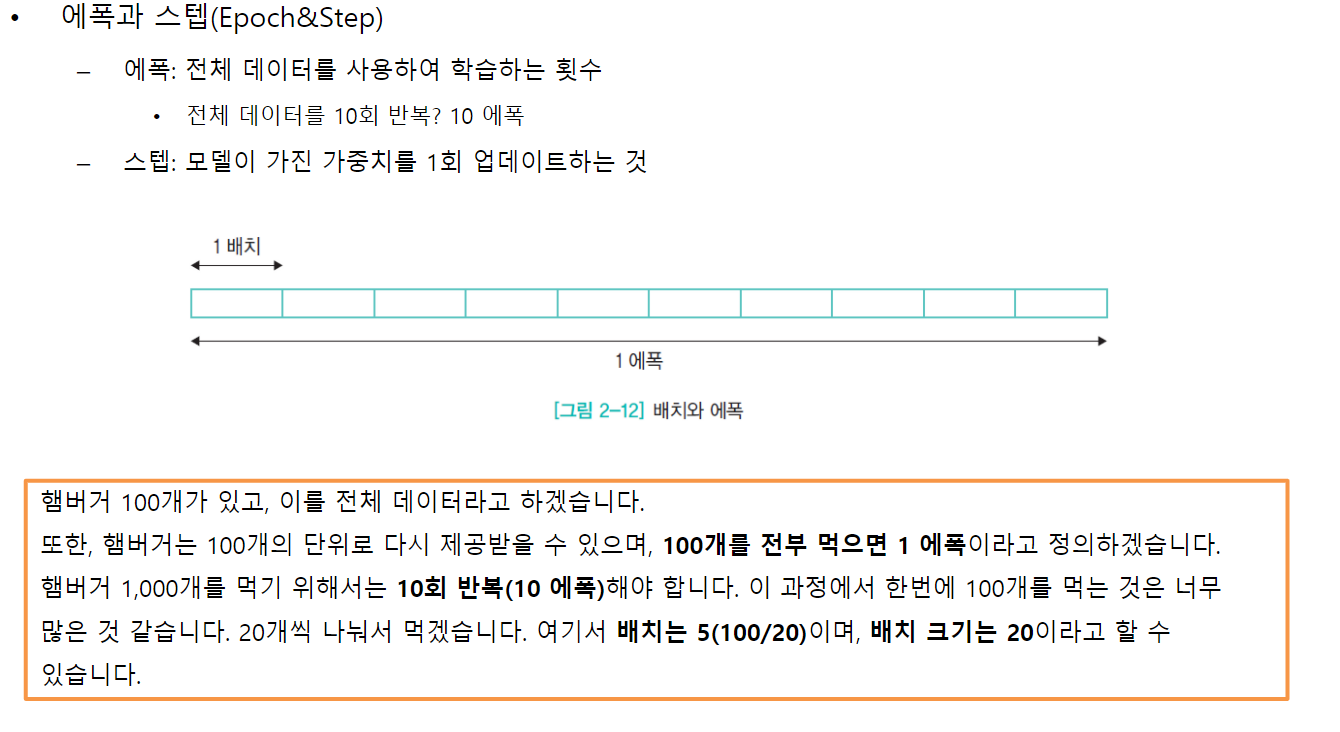

In [8]:
def get_steps(num_samples, batch_size):
    if (num_samples % batch_size) > 0 :
        return (num_samples // batch_size) + 1
    else :
        return num_samples // batch_size

In [9]:
history = model.fit(train_generator,
          steps_per_epoch=get_steps(len(train_df), batch_size),# 한 epoch에 사용한 스텝 수를 지정합니다. 
          validation_data = val_generator,
          validation_steps=get_steps(len(val_df), batch_size),
          epochs = 10)

Epoch 1/10
175/175 [==============================] - 25s 133ms/step - loss: 0.4781 - acc: 0.3618 - val_loss: 0.3396 - val_acc: 0.4237
Epoch 2/10
175/175 [==============================] - 23s 129ms/step - loss: 0.2804 - acc: 0.4654 - val_loss: 0.2673 - val_acc: 0.5822
Epoch 3/10
175/175 [==============================] - 23s 129ms/step - loss: 0.2564 - acc: 0.4837 - val_loss: 0.2530 - val_acc: 0.5261
Epoch 4/10
175/175 [==============================] - 22s 126ms/step - loss: 0.2247 - acc: 0.5111 - val_loss: 0.2349 - val_acc: 0.5383
Epoch 5/10
175/175 [==============================] - 22s 128ms/step - loss: 0.2070 - acc: 0.5188 - val_loss: 0.2238 - val_acc: 0.5027
Epoch 6/10
175/175 [==============================] - 22s 125ms/step - loss: 0.2003 - acc: 0.5292 - val_loss: 0.2032 - val_acc: 0.5542
Epoch 7/10
175/175 [==============================] - 22s 127ms/step - loss: 0.1773 - acc: 0.5477 - val_loss: 0.2338 - val_acc: 0.5349
Epoch 8/10
175/175 [==============================] - 2

## 학습 결과 그리기

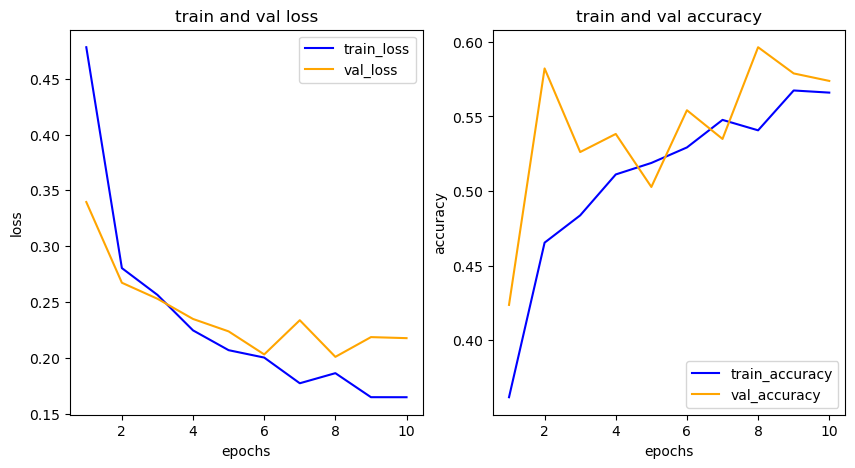

In [10]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_accuracy')
ax2.set_title('train and val accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

## 테스트 데이터 예측하기
- 테스트 데이터 또한 학습 데이터와 동일하게 전처리 해야한다.

In [11]:
test_datagen = ImageDataGenerator(rescale = 1./255)

# y_col: None, class_mode: None이므로
# test_generator는 image만 반환하고, label은 반환하지 않습니다.
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df, 
    directory=None,
    x_col = 'image',
    y_col = None,
    target_size = (112, 112),
    color_mode='rgb',
    class_mode=None,
    batch_size=batch_size,
    shuffle = False
)

Found 3416 validated image filenames.


In [12]:
preds = model.predict(test_generator,
                      steps = get_steps(len(test_df), batch_size),
                      verbose = 1)

107/107 [==============================] - 9s 85ms/step


In [13]:
preds.shape

(3416, 11)

In [14]:
preds[0]

array([2.5764430e-02, 2.1770777e-01, 6.1126454e-03, 1.0845073e-03,
       1.8374120e-01, 8.3238286e-01, 8.6408602e-03, 4.2407407e-04,
       8.5511786e-01, 1.4493245e-01, 3.8707179e-01], dtype=float32)

In [15]:
class_col

['black',
 'blue',
 'brown',
 'green',
 'red',
 'white',
 'dress',
 'shirt',
 'pants',
 'shorts',
 'shoes']

In [16]:
prob = zip(class_col, list(preds[1]))

In [17]:
sorted(list(prob), key = lambda z: z[1], reverse = True)

[('pants', 0.9991929),
 ('black', 0.76872987),
 ('green', 0.031202128),
 ('shorts', 0.022539346),
 ('blue', 0.021850172),
 ('shoes', 0.010240929),
 ('brown', 0.009820545),
 ('red', 0.0012703901),
 ('shirt', 0.00016337683),
 ('white', 2.0207244e-05),
 ('dress', 8.941376e-06)]

## 결과 확인하기

In [18]:
# !pip install opencv-python

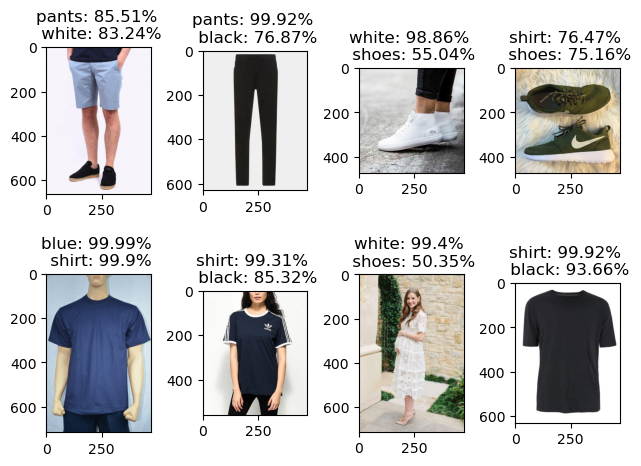

In [22]:
import matplotlib.pyplot as plt
import cv2 # OpenCV 실시간 이미지 프로세싱에 중점을 둔 라이브러리이다

# 8개만 예측해보도록 하겠습니다.
do_preds = preds[:8]

for i, pred in enumerate(do_preds):
    plt.subplot(2, 4, i + 1)
    prob = zip(class_col, list(pred)) # zip 함수: https://www.daleseo.com/python-zip/
    prob = sorted(list(prob), key = lambda z: z[1], reverse = True)[:2]
    
    image = cv2.imread(test_df['image'][i]) # 이미지 파일을 읽기
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    # cv2.cvtColor(): 본래의 색상 공간에서 다른 색상 공간으로 변환할 때 사용
    # cv2.COLOR_BGR2RGB : BGR -> RGB
    
    plt.imshow(image)
    plt.title(f'{prob[0][0]}: {round(prob[0][1] * 100, 2)}% \n {prob[1][0]}: {round(prob[1][1] * 100, 2)}%')
    
plt.tight_layout()
plt.show()